Step-1: Import the Necessary Dependencies

In [125]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

Step-2: Read and Load the Dataset

In [126]:
# Importing the dataset
df = pd.read_csv('/content/tweets.csv')
df.sample(5)

,id,label,tweet
7608,7609,0,"Kidnapping, Dead Bodies, & Actual… http://dlvr..."
2169,2170,0,It's not gold but I'll take it #spacegray #iph...
3340,3341,0,I have to give some to #apple for the #Iphone ...
2256,2257,0,"Second day of using my #iphoneX , I must admit..."
7160,7161,0,Gain Followers RT This MUST FOLLOW ME I FOLLOW...


Step-3: Exploratory Data Analysis

In [127]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [128]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [129]:
print('length of data is', len(df))

length of data is 7920


In [130]:
df.shape

(7920, 3)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [132]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

Checking for null values

In [133]:
np.sum(df.isnull().any(axis=1))

0

In [134]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [135]:
df['label'].unique()

array([0, 1])

Step-4: Data Visualization of Target Variables

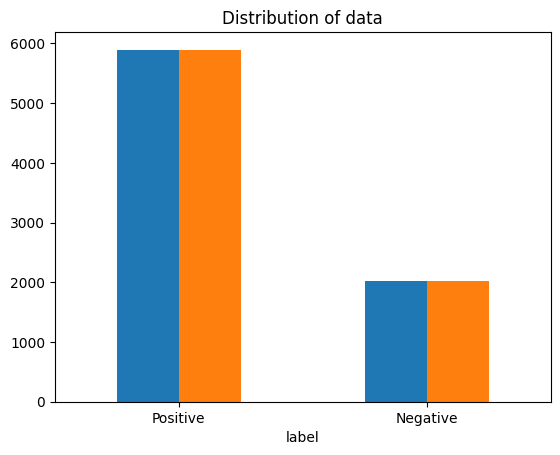

In [136]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Positive','Negative'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['label'])

<Axes: xlabel='label', ylabel='count'>

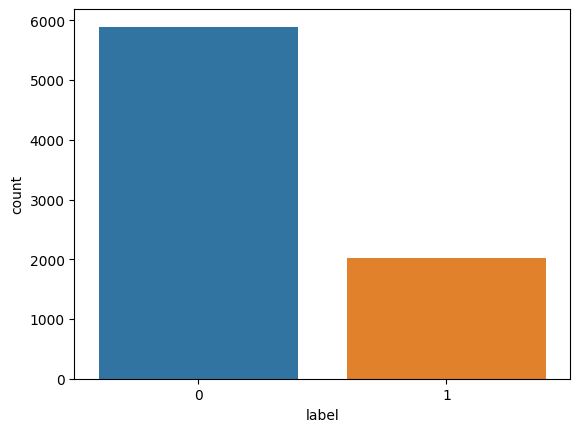

In [137]:
import seaborn as sns
sns.countplot(x='label', data=df)

Step-5: Data Preprocessing

Selecting the text and Target column for our further analysis


In [138]:
data=df[['tweet','label']]

In [139]:
data['label'] = data['label'].replace(0,0)

<ipython-input-139-3a24eee51558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace(0,0)


In [140]:
data['label'].unique()


array([0, 1])

Separating positive and negative tweets



In [141]:
data_pos = data[data['label'] == 0]
data_neg = data[data['label'] == 1]

In [142]:
data_pos

,tweet,label
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,0
1,Finally a transparant silicon case ^^ Thanks t...,0
2,We love this! Would you go? #talk #makememorie...,0
3,I'm wired I know I'm George I was made that wa...,0
6,Happy for us .. #instapic #instadaily #us #son...,0
...,...,...
7915,Live out loud #lol #liveoutloud #selfie #smile...,0
7916,We would like to wish you an amazing day! Make...,0
7917,Helping my lovely 90 year old neighbor with he...,0
7918,Finally got my #smart #pocket #wifi stay conne...,0


Combining positive and negative tweets


In [143]:
dataset = pd.concat([data_pos, data_neg])

Making statement text in lowercase



In [144]:
dataset['tweet']=dataset['tweet'].str.lower()
dataset['tweet'].tail()

7901    @brendan_brady1: the new apple advert can fuck...
7902    all i wanna do is put music from my itunes on ...
7904    #fuckyou #apple one thing stops working and i ...
7908    second fucking time. stay on hold for 30 mins ...
7913    ok so my galaxy crashed after one day now i ha...
Name: tweet, dtype: object

Defining set containing all stopwords in English.



In [145]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

Cleaning and removing the above stop words list from the tweet 



In [146]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally transparant silicon case ^^ thanks unc...
2    love this! would go? #talk #makememories #unpl...
3    i'm wired know i'm george made way ;) #iphone ...
6    happy us .. #instapic #instadaily #us #sony #x...
Name: tweet, dtype: object

Cleaning and removing punctuations



In [147]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].tail()

7901    brendanbrady1 new apple advert fuck off apple ...
7902    wanna put music itunes iphone fucking difficul...
7904    fuckyou apple one thing stops working buy whol...
7908    second fucking time stay hold 30 mins phone st...
7913    ok galaxy crashed one day wait til monday skyr...
Name: tweet, dtype: object

Cleaning and removing repeating characters



In [148]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet'].tail()

7901    brendanbrad1 new apple advert fuck off apple r...
7902    wanna put music itunes iphone fucking difficul...
7904    fuckyou apple one thing stops working buy whol...
7908    second fucking time stay hold 30 mins phone st...
7913    ok galaxy crashed one day wait til monday skyr...
Name: tweet, dtype: object

Cleaning and removing URLs



In [149]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_URLs(x))
dataset['tweet'].tail()

7901    brendanbrad1 new apple advert fuck off apple r...
7902    wanna put music itunes iphone fucking difficul...
7904    fuckyou apple one thing stops working buy whol...
7908    second fucking time stay hold 30 mins phone st...
7913    ok galaxy crashed one day wait til monday skyr...
Name: tweet, dtype: object

Cleaning and removing numeric numbers



In [150]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_numbers(x))
dataset['tweet'].tail()

7901    brendanbrad new apple advert fuck off apple re...
7902    wanna put music itunes iphone fucking difficul...
7904    fuckyou apple one thing stops working buy whol...
7908    second fucking time stay hold  mins phone star...
7913    ok galaxy crashed one day wait til monday skyr...
Name: tweet, dtype: object

Getting tokenization of tweet text



In [151]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset['tweet'].head()

0    [fingerprint, pregnancy, test, httpsgooglmfqv,...
1    [finally, transparant, silicon, case, thanks, ...
2    [love, this, would, go, talk, makememories, un...
3    [im, wired, know, im, george, made, way, iphon...
6    [happy, us, instapic, instadaily, us, sony, xp...
Name: tweet, dtype: object

Applying stemming

In [152]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet']= dataset['tweet'].apply(lambda x: stemming_on_text(x))
dataset['tweet'].head()

0    [fingerprint, pregnancy, test, httpsgooglmfqv,...
1    [finally, transparant, silicon, case, thanks, ...
2    [love, this, would, go, talk, makememories, un...
3    [im, wired, know, im, george, made, way, iphon...
6    [happy, us, instapic, instadaily, us, sony, xp...
Name: tweet, dtype: object

Applying Lemmatizer

In [153]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [fingerprint, pregnancy, test, httpsgooglmfqv,...
1    [finally, transparant, silicon, case, thanks, ...
2    [love, this, would, go, talk, makememories, un...
3    [im, wired, know, im, george, made, way, iphon...
6    [happy, us, instapic, instadaily, us, sony, xp...
Name: tweet, dtype: object

Separating input feature and label


In [154]:
X=data.tweet
y=data.label

Plot a cloud of words for negative tweets



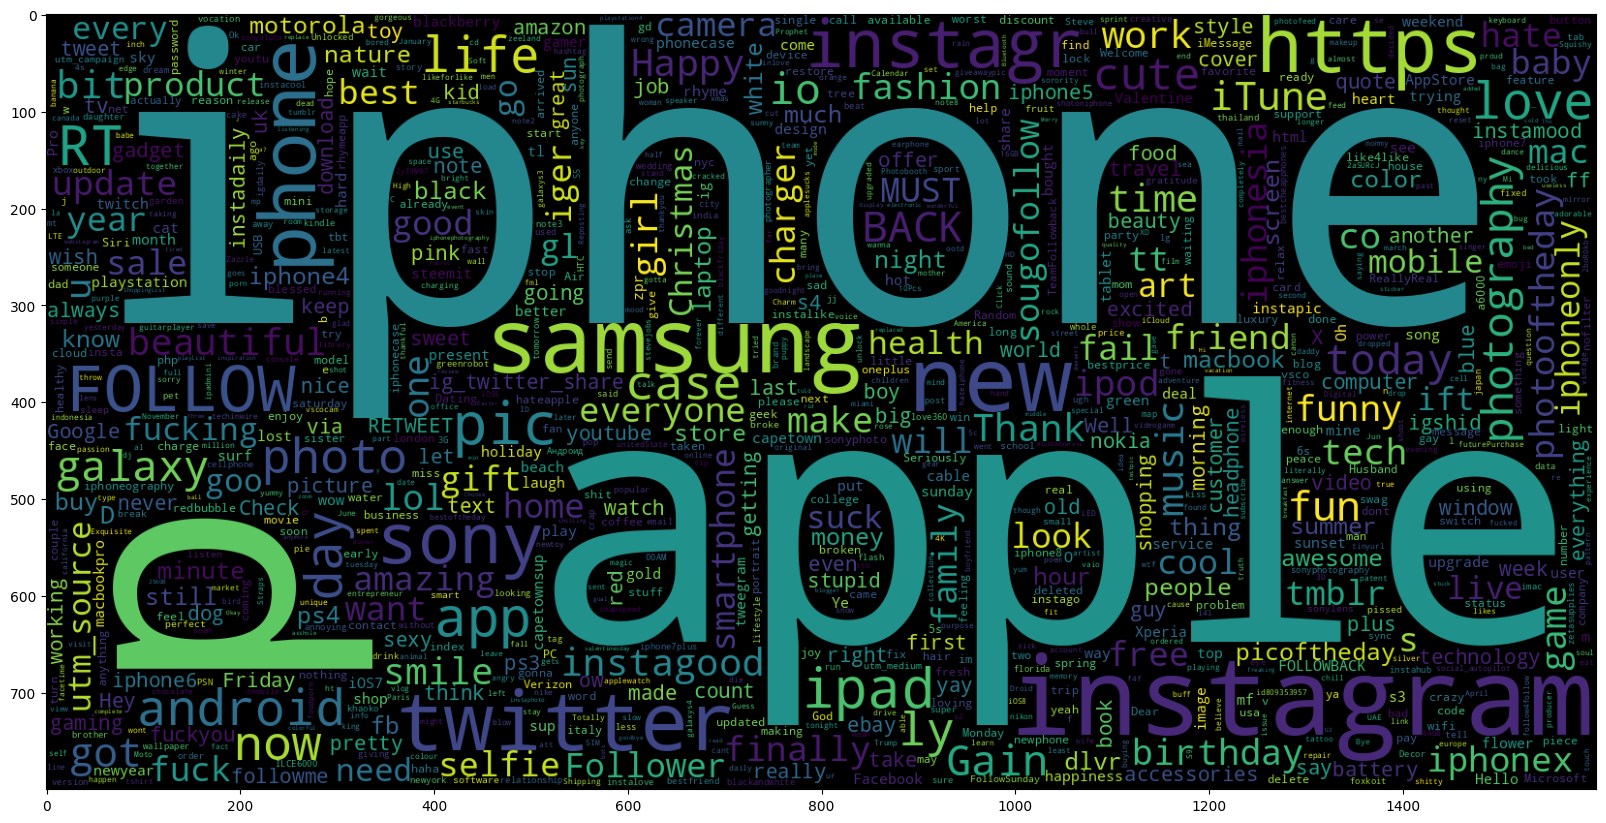

In [155]:
data_neg = data['tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

Plot a cloud of words for positive tweets



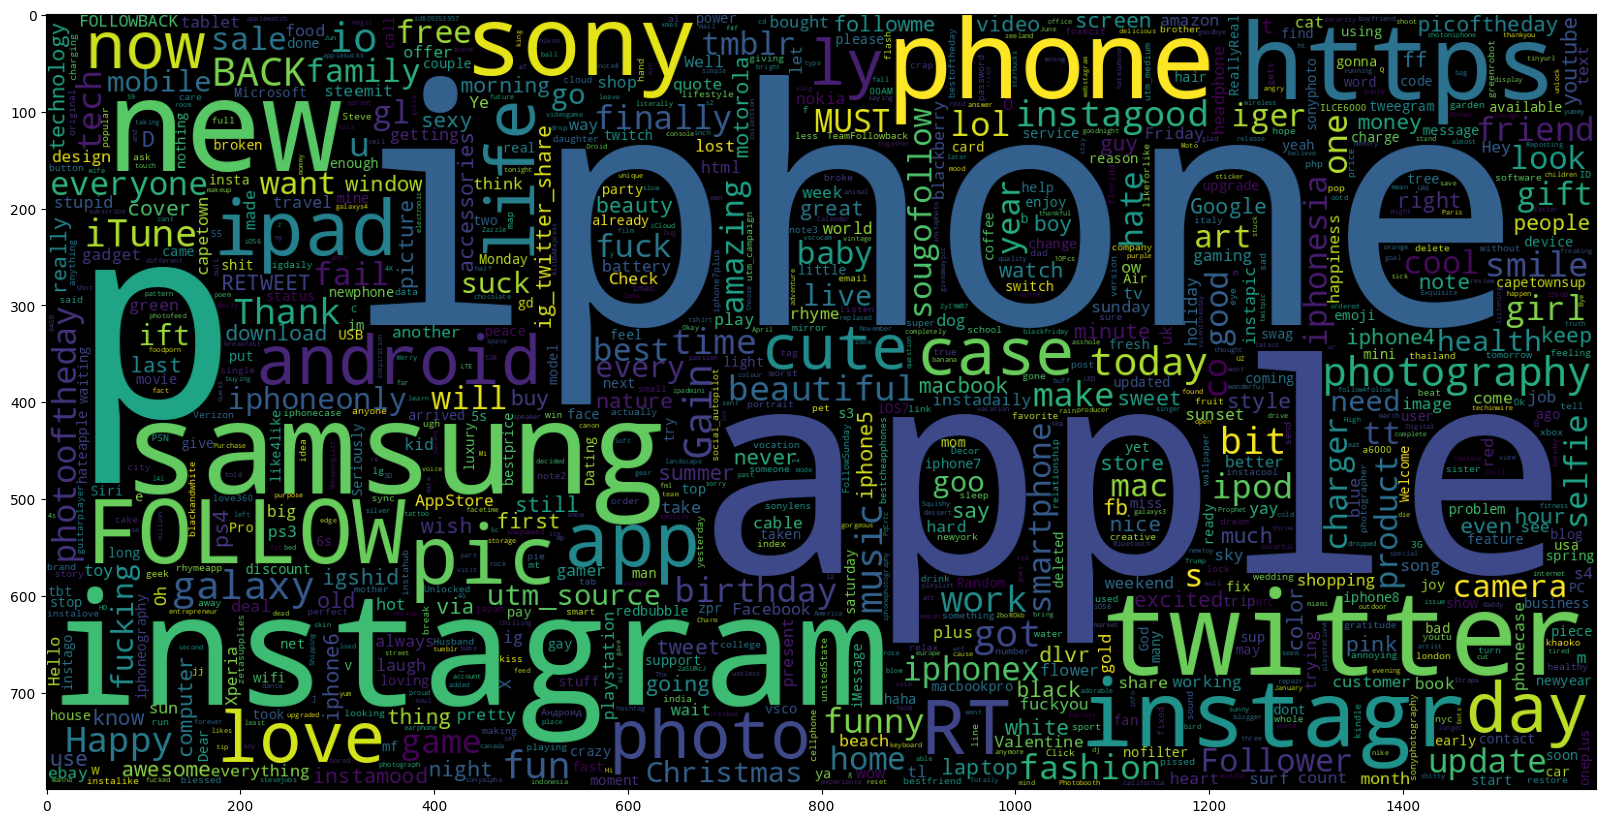

In [157]:
data_pos = data['tweet']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

Step-6: Splitting Our Data Into Train and Test Subsets


In [158]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =1)

Step-7: Transforming the Dataset Using TF-IDF Vectorizer

Fit the TF-IDF Vectorizer

In [160]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  97144


Transform the data using TF-IDF Vectorizer



In [161]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

Model Fitting

Model 1

In [166]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred1= SVCmodel.predict(X_test)

Accuracy Score: 87.37373737373737
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       278
           1       0.77      0.81      0.79       118

    accuracy                           0.87       396
   macro avg       0.85      0.86      0.85       396
weighted avg       0.88      0.87      0.87       396



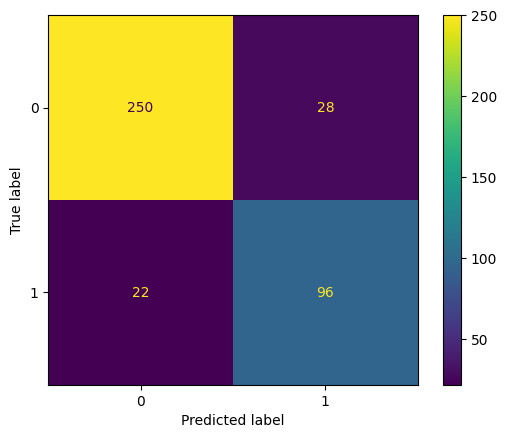

In [173]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#print the accuracy score for the dataset
print('Accuracy Score:',accuracy_score(y_test,y_pred1)*100)
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred1))
# Compute and plot the Confusion matrix
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

Model 2

In [174]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred2 = BNBmodel.predict(X_test)

Accuracy Score: 77.77777777777779
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       278
           1       0.94      0.27      0.42       118

    accuracy                           0.78       396
   macro avg       0.85      0.63      0.64       396
weighted avg       0.82      0.78      0.73       396



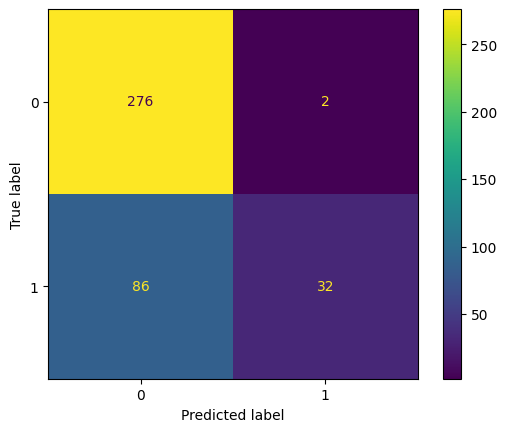

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#print the accuracy score for the dataset
print('Accuracy Score:',accuracy_score(y_test,y_pred2)*100)
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred2))
# Compute and plot the Confusion matrix
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

Model-3



In [177]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

Accuracy Score: 87.87878787878788
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       278
           1       0.79      0.81      0.80       118

    accuracy                           0.88       396
   macro avg       0.85      0.86      0.86       396
weighted avg       0.88      0.88      0.88       396



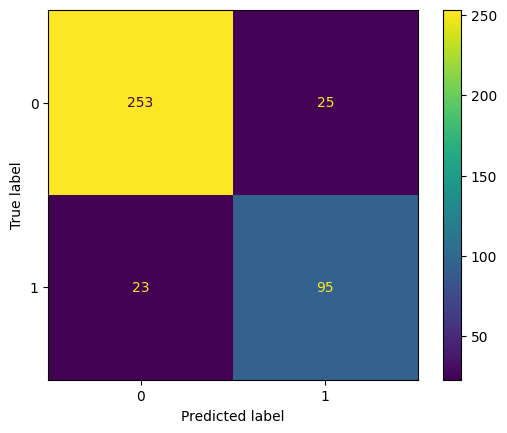

In [178]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#print the accuracy score for the dataset
print('Accuracy Score:',accuracy_score(y_test,y_pred3)*100)
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred3))
# Compute and plot the Confusion matrix
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))